# Relatório de análise VII

## Criando Agrupamento

In [63]:
import pandas as pd

In [64]:
dados = pd.read_csv('Dados/aluguel.csv', sep = ';')

In [65]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [66]:
dados.Bairro.unique()

array(['Copacabana', 'Jardim Botânico', 'Barra da Tijuca', 'Centro',
       'Higienópolis', 'Vista Alegre', 'Cachambi', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Botafogo', 'Taquara',
       'Freguesia (Jacarepaguá)', 'Tijuca', 'Olaria', 'Leblon',
       'São Cristóvão', 'Ipanema', 'Campo Grande',
       'Recreio dos Bandeirantes', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Vargem Grande', 'São Conrado', 'Maria da Graça', 'Vila Valqueire',
       'Gávea', 'Cosme Velho', 'Bonsucesso', 'Todos os Santos',
       'Laranjeiras', 'Itanhangá', 'Flamengo', 'Praça Seca', 'Piedade',
       'Lagoa', 'Santo Cristo', 'Largo do Machado', 'Catete',
       'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Quintino Bocaiúva', 'São Francisco Xavier', 'Rocha Miranda',
       'Engenho Novo', 'Engenho de Dentro', 'Cidade Nova', 'Pilares',
       'Arpoador', 'Tomás Coelho', 'Água Santa', 'Ilha do Governador',
       'Ja

In [67]:
dados['Valor'].mean()

12952.659715265761

In [68]:
bairros = ['Copacabana', 'Jardim Botânico', 'Barra da Tijuca', 'Centro','Higienópolis']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [69]:
dados['Bairro'].drop_duplicates()

0         Copacabana
1    Jardim Botânico
2    Barra da Tijuca
3             Centro
4       Higienópolis
Name: Bairro, dtype: object

In [70]:
grupo_bairro = dados.groupby('Bairro')

In [71]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [72]:
grupo_bairro.groups

{'Barra da Tijuca': [2, 7, 20, 22, 30, 35, 41, 44, 49, 59, 60, 76, 78, 81, 89, 90, 93, 97, 103, 104, 111, 112, 115, 134, 146, 155, 156, 157, 158, 159, 163, 165, 168, 172, 176, 179, 192, 194, 197, 199, 203, 225, 228, 230, 247, 248, 251, 255, 260, 261, 274, 277, 281, 306, 315, 325, 330, 332, 340, 347, 348, 354, 358, 364, 368, 374, 387, 390, 399, 401, 408, 416, 419, 434, 440, 441, 442, 444, 452, 455, 456, 465, 470, 471, 493, 499, 505, 509, 512, 513, 522, 530, 544, 546, 554, 558, 566, 573, 581, 583, ...], 'Centro': [3, 9, 10, 38, 45, 46, 52, 54, 72, 86, 87, 94, 100, 105, 108, 127, 128, 136, 144, 161, 174, 178, 186, 220, 239, 240, 241, 242, 252, 270, 278, 284, 286, 307, 319, 328, 333, 337, 338, 356, 373, 379, 380, 382, 393, 394, 404, 417, 437, 445, 454, 457, 462, 472, 478, 480, 500, 533, 562, 567, 579, 638, 657, 659, 683, 690, 693, 706, 712, 749, 752, 771, 790, 793, 803, 824, 852, 853, 859, 873, 879, 880, 903, 911, 922, 924, 930, 947, 950, 970, 972, 974, 976, 986, 990, 993, 995, 997, 1006, 

In [73]:
for bairro, dados in grupo_bairro:
    print(type(dados))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [74]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 9019.593829923273
Centro -> 19004.972375690606
Copacabana -> 4509.83453689168
Higienópolis -> 2525.0
Jardim Botânico -> 8779.8


In [75]:
grupo_bairro[['Valor','Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,9019.59,3599.17
Centro,19004.97,5247.40
Copacabana,4509.83,1211.94
Higienópolis,2525.00,212.00
Jardim Botânico,8779.80,1576.12


## Estatísticas Descritivas

In [76]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,6256.0,9019.59,30192.24,100.0,2000.0,3500.0,8000.0,738197.0
Centro,3258.0,19004.97,59355.76,90.0,1000.0,3705.5,15000.0,950000.0
Copacabana,3185.0,4509.83,6413.41,100.0,1900.0,3000.0,4900.0,198000.0
Higienópolis,32.0,2525.00,3988.88,650.0,800.0,1025.0,1600.0,20000.0
Jardim Botânico,350.0,8779.80,11680.25,1100.0,3000.0,4000.0,9425.0,120000.0


In [77]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,100.0,738197.0,56426579.0
Centro,90.0,950000.0,61918200.0
Copacabana,100.0,198000.0,14363823.0
Higienópolis,650.0,20000.0,80800.0
Jardim Botânico,1100.0,120000.0,3072930.0


In [78]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Somatória'})

,Mínimo,Máximo,Somatória
Bairro,,,
Barra da Tijuca,100.0,738197.0,56426579.0
Centro,90.0,950000.0,61918200.0
Copacabana,100.0,198000.0,14363823.0
Higienópolis,650.0,20000.0,80800.0
Jardim Botânico,1100.0,120000.0,3072930.0


In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

<AxesSubplot:xlabel='Bairro'>

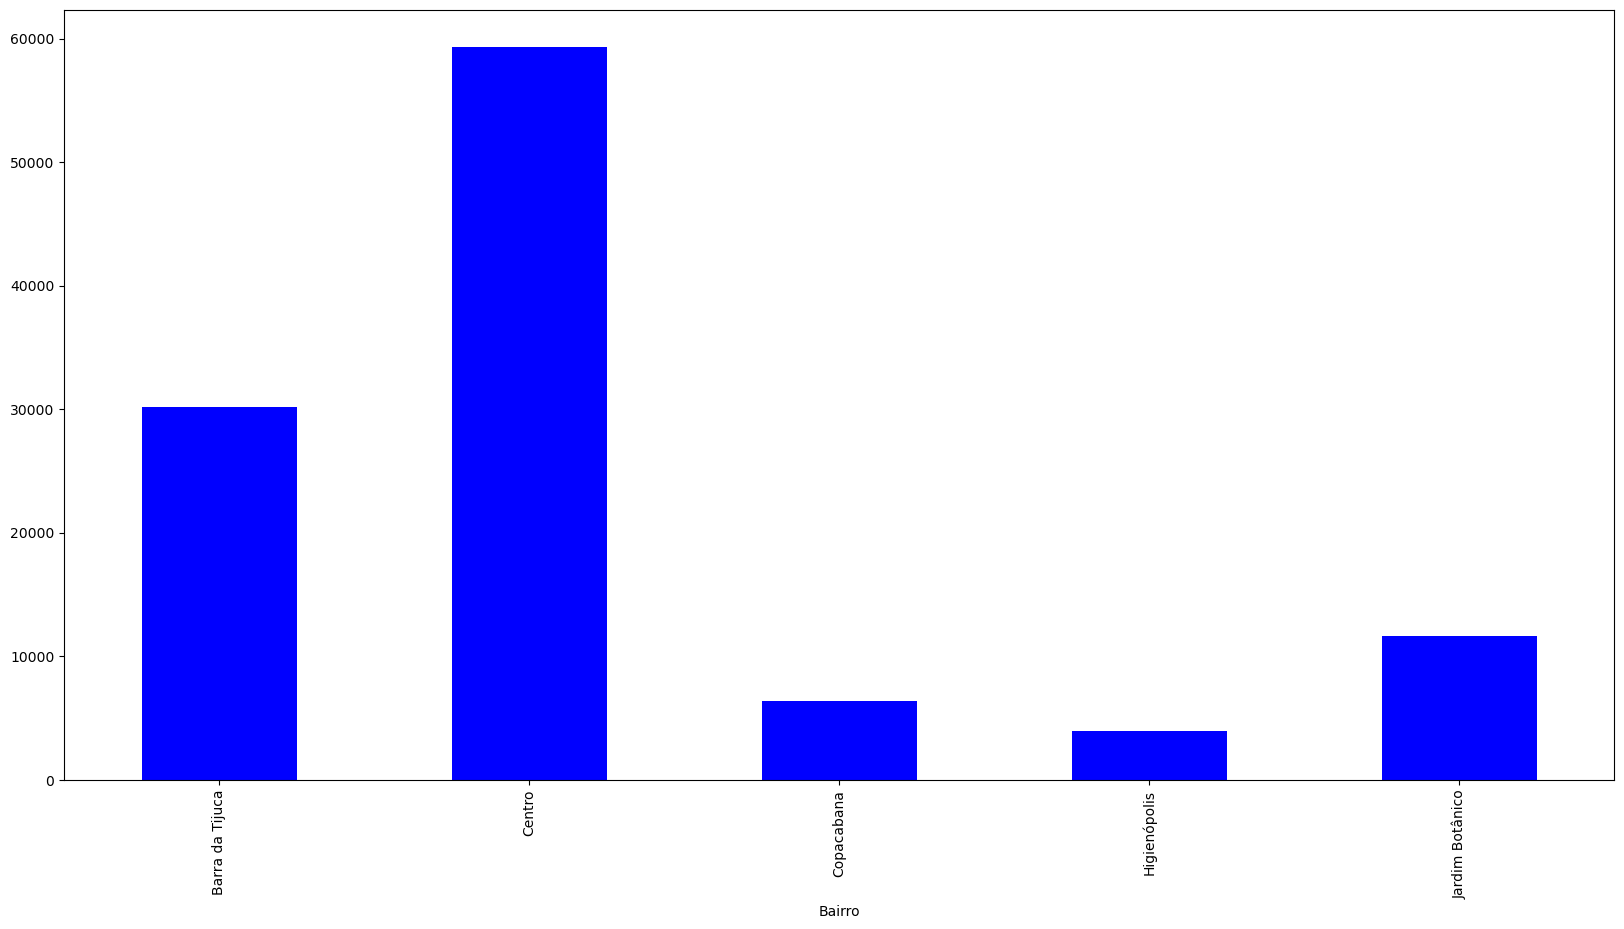

In [80]:
grupo_bairro['Valor'].std().plot.bar(color = 'blue')

Text(0.5, 1.0, 'Valor Médio do Aluguel do Bairro')

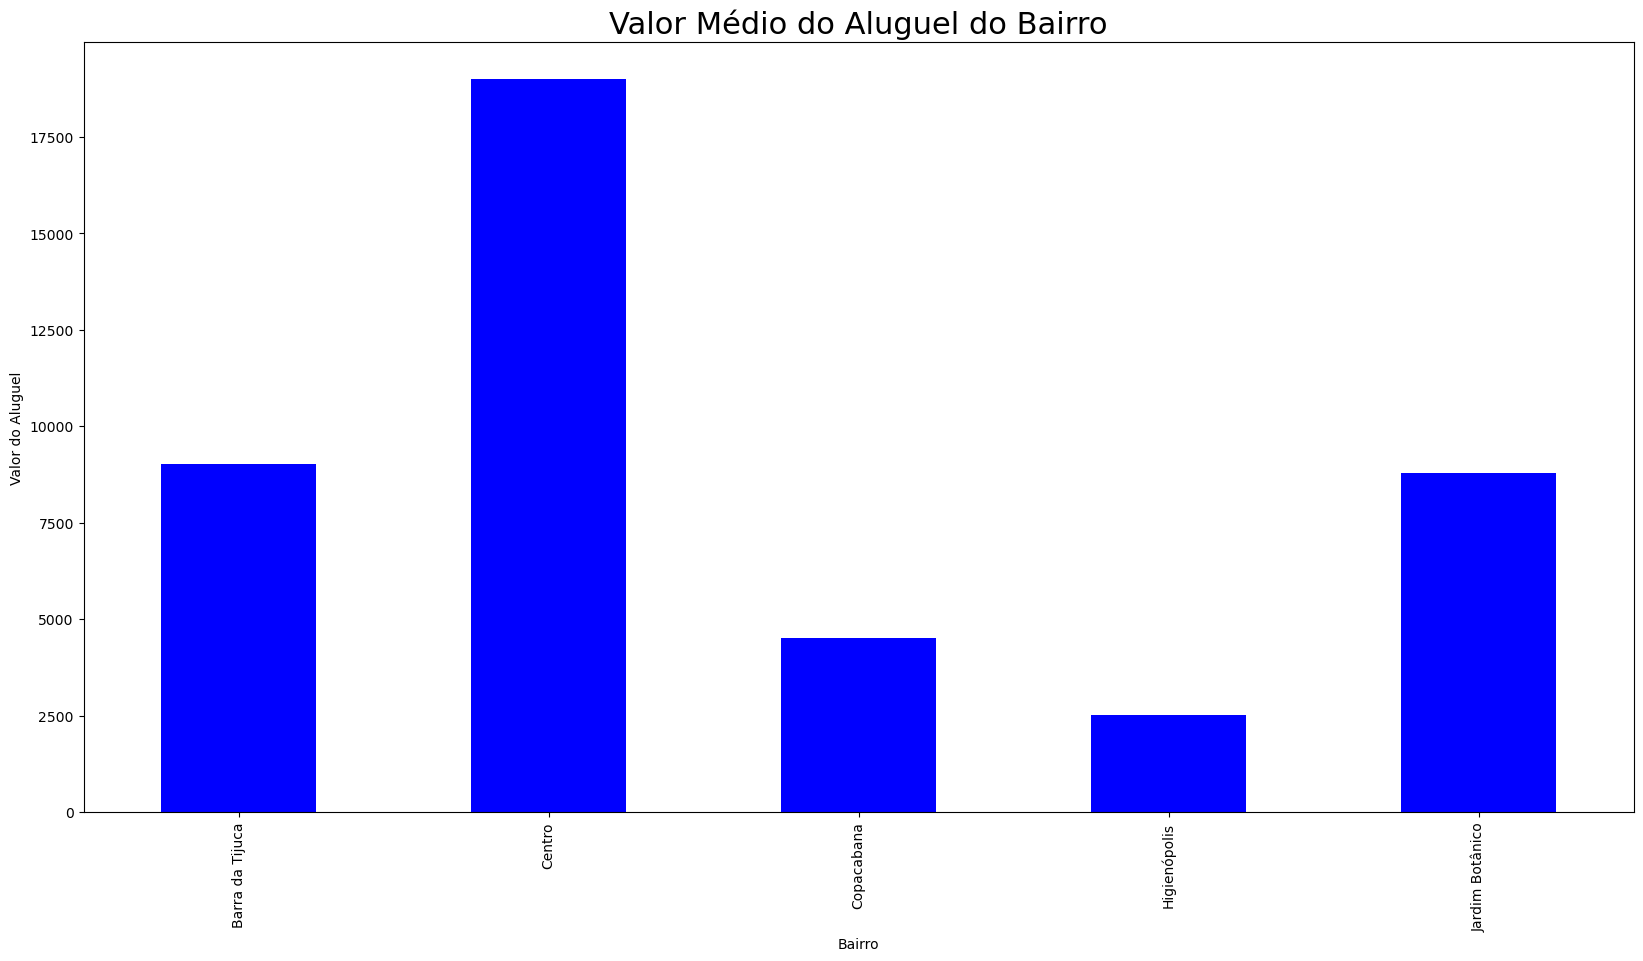

In [81]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel do Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel do Bairro')

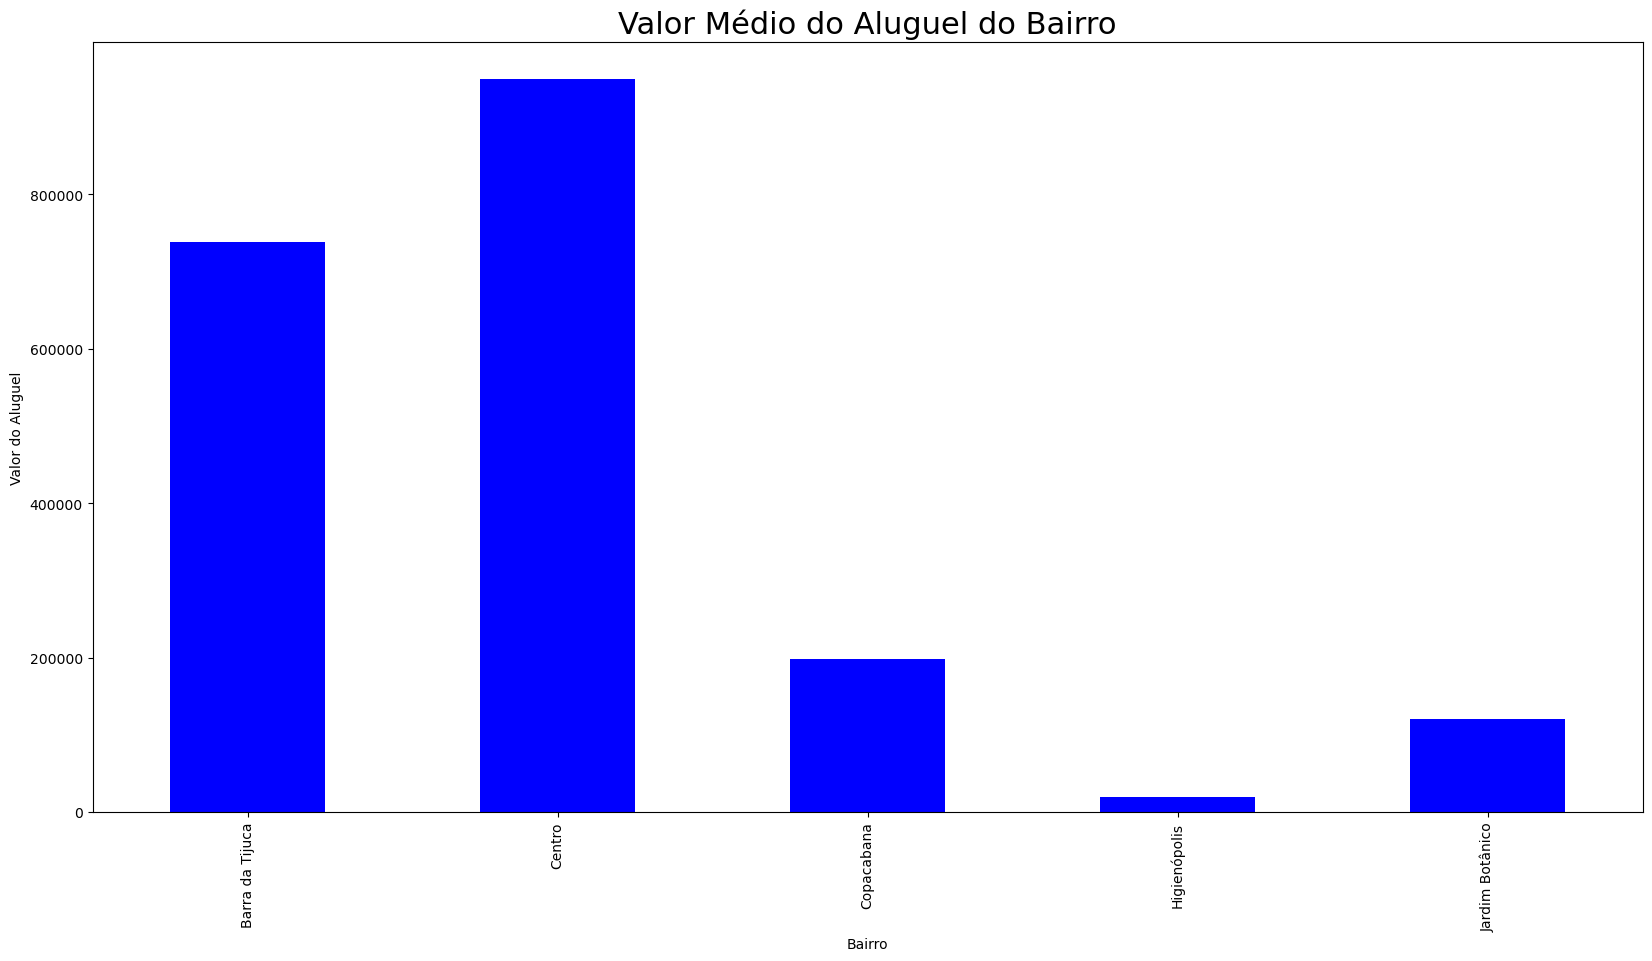

In [82]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel do Bairro', {'fontsize': 22})